<a href="https://colab.research.google.com/github/villafue/Python_Statistics/blob/master/Boston_Mini_Project_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Here is a student's answer to Lab 4: [Julio Cardenas](https://gist.github.com/JCardenasRdz/54a151ea6c068d6a4e6f7d45dcd7b378) Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [4]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.data.shape

(506, 13)

In [7]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [9]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [10]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [11]:
print(boston.target.shape)

(506,)


In [12]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [13]:
bos.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

</div>

Text(0.5, 1.0, 'Relationship between CRIM and Price')

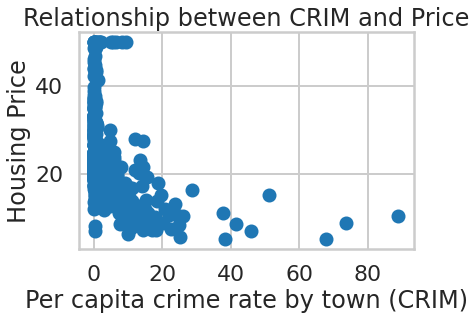

In [14]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

# your turn: describe relationship
'''
It does not look linear. It looks like an exponential curve where , on the left side by zero, lies the majority of data. With little or no crime the price of homes ranges from cheap to expensive.
However, crime grows, the price of homes tends to stay cheap.
''' 

Text(0.5, 1.0, 'Relationship between RM and Price')

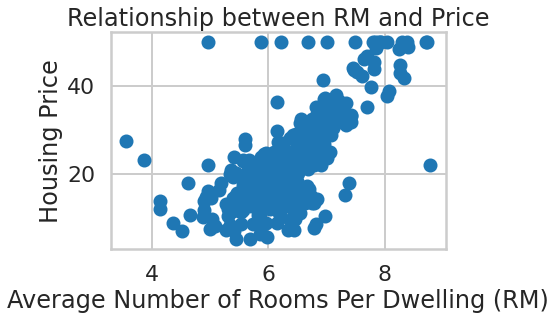

In [16]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms Per Dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

# your turn: describe relationship
'''
It looks like a linear relationship where more rooms tends to command a higher price. However, I believe there are other variables at play 
as sometimes the price of homes are still cheap despite having many rooms.
'''

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

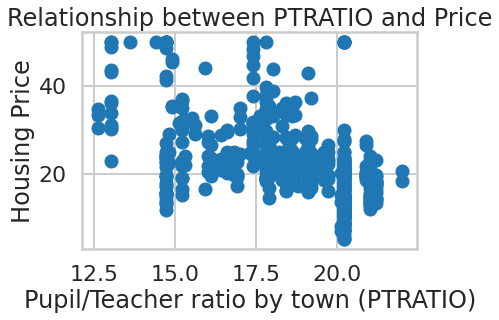

In [18]:
# your turn: scatter plot between *PTRATIO* and *PRICE*

plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil/Teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

# your turn: describe relationship
'''
This looks like a Rorsarch test and I see an alien animal. I think it's useless (or I just don't see a relationship).
Update: After speaking ot my mentor, it is somewhat of a negative linear relationship...if I squint really hard and pray.
'''

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

Text(0.5, 1.0, 'Relationship between B and Price')

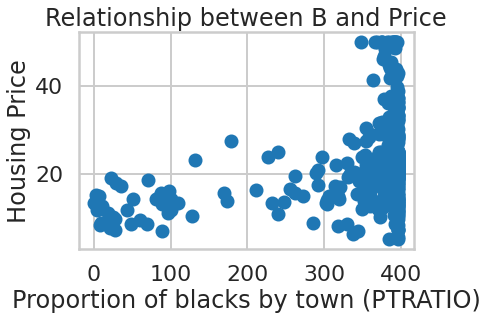

In [20]:
# your turn: create some other scatter plots
# scatter plot between *B* and *PRICE*

plt.scatter(bos.B, bos.PRICE)
plt.xlabel("Proportion of blacks by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between B and Price")

'''
This is a scatter plot of the proportion of the black population by town. I was interested to see if race played a role in house prices.
However, I don't see a clear relationship execpt that less black americans meant lower home prices.
'''

Text(0.5, 1.0, 'Relationship between Tax and Price')

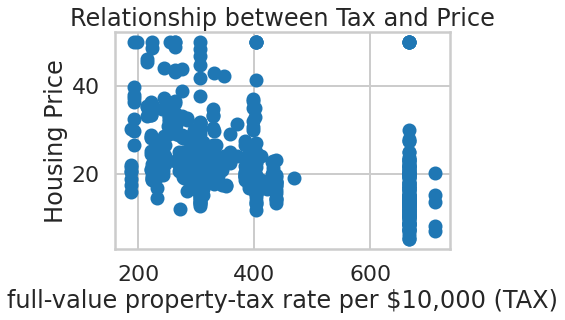

In [22]:
# your turn: create some other scatter plots
# scatter plot between *TAX* and *PRICE*

plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel("full-value property-tax rate per $10,000 (TAX)")
plt.ylabel("Housing Price")
plt.title("Relationship between Tax and Price")

'''
I picked this one because I absolutely hate taxes and I wonder about its role in the price of homes. It is somewhat of a negative linear
relationship.
'''

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

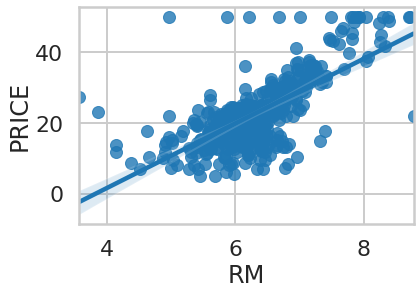

In [24]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the below histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

_A:_ The point of taking the log of the above was because it helps us to see the data we would otherwise miss. In this example, we saw two peaks.
If we do the inverse of the natural log, we would find the exact values.

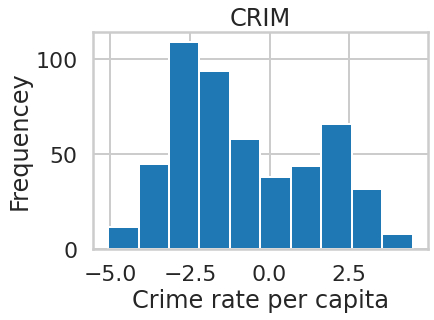

In [25]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

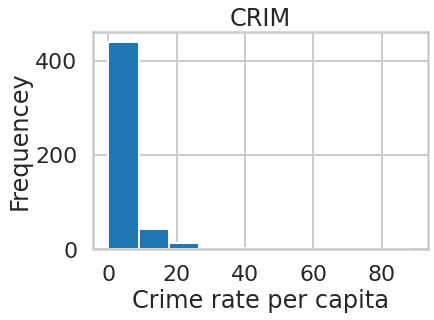

In [26]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

Text(0.5, 1.0, 'Amount of rooms per home')

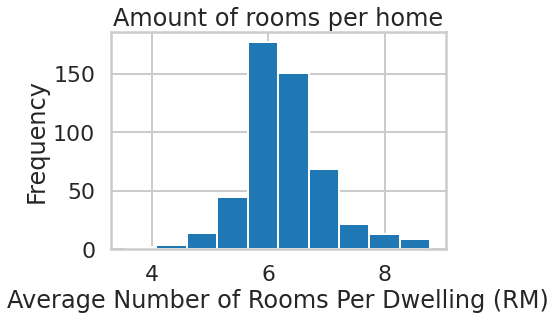

In [28]:
#your turn
plt.hist(bos.RM)
plt.xlabel("Average Number of Rooms Per Dwelling (RM)")
plt.ylabel("Frequency")
plt.title("Amount of rooms per home")

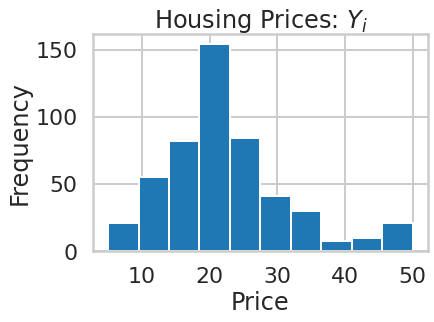

In [29]:
plt.hist(bos.PRICE)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

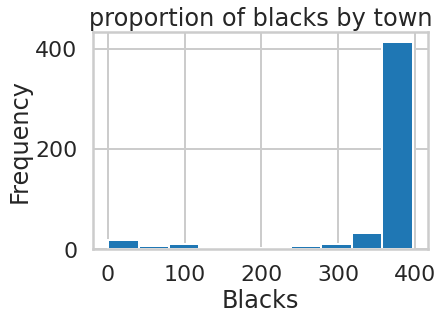

In [30]:
plt.hist(bos.B)
plt.title('proportion of blacks by town')
plt.xlabel('Blacks')
plt.ylabel('Frequency')
plt.show()

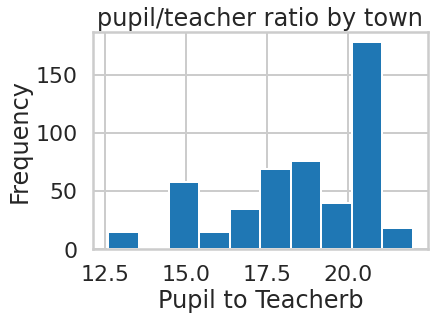

In [31]:
plt.hist(bos.PTRATIO)
plt.title('pupil/teacher ratio by town')
plt.xlabel('Pupil to Teacherb')
plt.ylabel('Frequency')
plt.show()

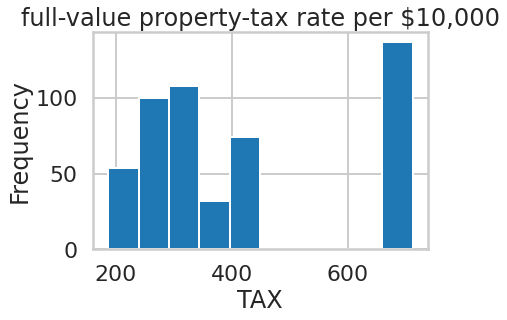

In [32]:
plt.hist(bos.TAX)
plt.title('full-value property-tax rate per $10,000')
plt.xlabel('TAX')
plt.ylabel('Frequency')
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [33]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [34]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           2.49e-74
Time:                        21:32:54   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

"\nIt looks alright to me. It's not exactly linear but I do see a linear relationship.\n"

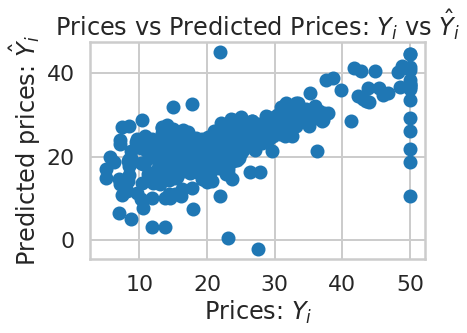

In [35]:
# your turn

plt.scatter(bos['PRICE'], m.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
'''
It looks alright to me. It's not exactly linear but I do see a linear relationship.
'''

### Fitting Linear Regression using `sklearn`


In [36]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [118]:
# Look inside lm object
# lm.<tab>

array([-2.1571753])

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [38]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

_A:_ I would change fit_intercept = False in order to have the intercept go through the origin. I would not recommend having an intercept as
a the price of homes should be 0 if all other variables are 0. It doesn't make sense to have a price of home without any features.

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

_A:_ No, because a normal distribution does not check to see if the residuals are independently distributed. That has to be checked regardless of normalcy. 

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>

_A:_ False, because we can use linear regression either whether $Y$ is normal or not. Typically, we run data transformations on the independent variables.
</div>


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [40]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508978


In [41]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [42]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [43]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

</div>

"\nI guess the outliers would be anything under 10ish and anything over 35ish. It looks normalish, center of about 20ish. It's also kind of \nnormalish. I don't think we should get rid of the outliers and it could be because they could be crack houses or forclosures or something \nunique.\n"

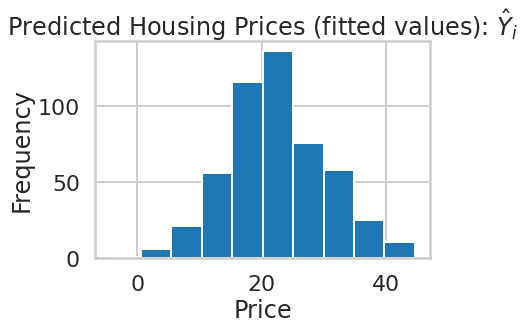

In [44]:
# your turn
plt.hist(lm.predict(X))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
'''
I guess the outliers would be anything under 10ish and anything over 35ish. It looks normalish, center of about 20ish. It's also kind of 
normalish. I don't think we should get rid of the outliers and it could be because they could be crack houses or forclosures or something 
unique.
'''

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

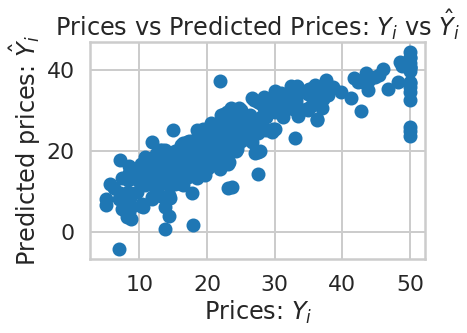

In [45]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>

Here is a list of answers: [link text](https://becominghuman.ai/stats-models-vs-sklearn-for-linear-regression-f19df95ad99b)

Statsmodels is good because it is easy to print a summary of numerous statistics. It is also the closest approximation to R. Unfortunately, you have to manually add a constant whereas SKLearn does this automatically.

SKLearn is good for cross-validation more intuitive for plotting models.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [46]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [47]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064256


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

_A:_ For every one unit increase in the ratio of pupil to teachers, the price of homes goes down about 2.15 points (equates to a little over $2,000)
</div>

In [122]:
# your turn
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))
print('The estimated coefficient is: {}'.format(lm.coef_))

Estimated intercept coefficient: 62.34462747483265
Number of coefficients: 1
The estimated coefficient is: [-2.1571753]


The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

_A:_ The R-Squared value is relatively low meaning that the model does not accurately explain all the variance in the dependent variable. This makes sense if you look at the above scatter plot with the linear regression line plotted with it. It does not have good fit.

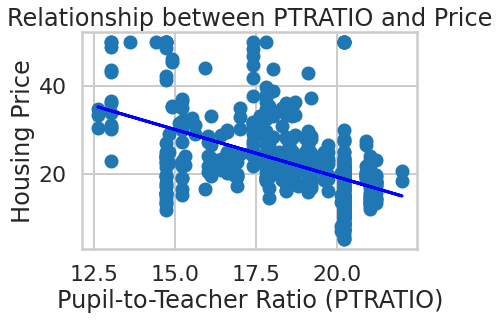

In [52]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

In [53]:
essPTRATIO = np.sum((lm.predict(X[['PTRATIO']]) - np.mean(bos.PRICE)) ** 2)
essPTRATIO

11014.282208052497

In [50]:
rssPTRATIO = np.sum((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
rssPTRATIO

31702.013206967255

In [54]:
tssPTRATIO = essPTRATIO + rssPTRATIO
tssPTRATIO

42716.29541501975

In [130]:
r2PTRATIO = essPTRATIO / tssPTRATIO
print('The R-Squared value is:', r2PTRATIO)
print('The R-Squared value is: {}'.format(lm.score(X[['PTRATIO']], bos.PRICE)))

The R-Squared value is: 0.25784731800922267
The R-Squared value is: 0.257847318009223


<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

$$F = \frac{MSR}{MSE}$$

_A:_ The F-Statistic below tells me that I have a high probability that the null hypothesis is false. This is true because the probability that 
the Parent / Teacher ratio variable does not affect housing prices is practically zero. The PTRATIO variable most probably does affect housing
prices. 



In [49]:
'''
This was already done. I did not calculate this and I don't know if it is correct.
'''
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
msePTRATIO

62.65220001376923

In [51]:
'''
This is the one I calculated based on the formulas above.
'''
N_PTRATIO = len(bos.PTRATIO)
K_PTRATIO = 1 # K = 1 because only 1 variable
mse_PTRATIO = rssPTRATIO / (N_PTRATIO - K_PTRATIO - 1)
mse_PTRATIO

62.90081985509376

In [56]:
msrPTRATIO = essPTRATIO / K_PTRATIO
msrPTRATIO

11014.282208052497

In [131]:
F_PTRATIO = msrPTRATIO / mse_PTRATIO
F_PTRATIO
print('The F-Statistic is: ', F_PTRATIO)

The F-Statistic is:  175.10554287569514


In [58]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           1.61e-34
Time:                        21:32:56   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>

If you add up all the t-statistics in a model (minus the intercept) and square it, it will give you the F-statistic. 

Furthermore, the t-statistic is like the F-statistic except only for its corresponding probability. It helps to identify the probability that its variable affects the dependent variable. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In [61]:
# your turn
'''
1. The F-stat says that these three variables are statistically significant in respect to affecting the housing price. 

2. The R-Squared statistic says that this model is a better fit for accounting for all the variance in the housing price. It is a better fit
than the one above.

3. All the variables are statistically significant in predicitng the price of homes. As the per capita crime rate goes up by one point, the 
average price of homes goes down prorportionally by 20%. This equates to $200. Furthermore, as the Parent / Teacher ratio increases by one
point, the average price of homes decreases by about $1,000. Last, for each increase in room size, the average price of homes increases by 
almost $7,400.
'''
m3 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           6.15e-98
Time:                        21:32:56   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [62]:
2 * 1 - 2 * (-1612.0)

3226.0

In [63]:
from statsmodels.stats.anova import anova_lm
anovaResults = anova_lm(m, m3)
print(anovaResults)

   df_resid           ssr  df_diff       ss_diff           F        Pr(>F)
0     504.0  31702.013207      0.0           NaN         NaN           NaN
1     502.0  17328.237120      2.0  14373.776087  208.204549  1.427422e-66


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [64]:
''' Code Below didn't work but was for manual F-Statistic
RSS_reduced = rssPTRATIO
price_array = bos.PRICE.to_numpy()
RSS_full = np.sum((price_array - lm.predict(X)) ** 2)
DF_reduced = N_PTRATIO - K_PTRATIO - 1
K_X = 13 # K = 13 because 13 variables total
DF_full = len(X) - K_X - 1
'''

" Code Below didn't work but was for manual F-Statistic\nRSS_reduced = rssPTRATIO\nprice_array = bos.PRICE.to_numpy()\nRSS_full = np.sum((price_array - lm.predict(X)) ** 2)\nDF_reduced = N_PTRATIO - K_PTRATIO - 1\nK_X = 13 # K = 13 because 13 variables total\nDF_full = len(X) - K_X - 1\n"


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

# Resource for Exercise 5:
I found this resource myself. Springboard didn't provide it. Go to this link: [Creating Diagnostic Plots in Python](https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/)

Similar links for how to create these plots: 

[Emulating R regression plots in Python](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034)

[Similar as above but his personal blog. It might help](https://https://emredjan.github.io/blog/2017/07/11/emulating-r-plots-in-python/)


In [65]:
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [66]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)
p = pd.DataFrame(boston.target, columns = ['PRICE'])

# generate OLS model
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, p], axis=1)

In [67]:
# m = ols('PRICE ~ PTRATIO',bos).fit()
m13 = ols('PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT',bos).fit()
print(m13.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.8
Date:                Mon, 03 Aug 2020   Prob (F-statistic):          1.92e-131
Time:                        21:32:56   Log-Likelihood:                -1509.5
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.7594      4.992      5.961      0.0

Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

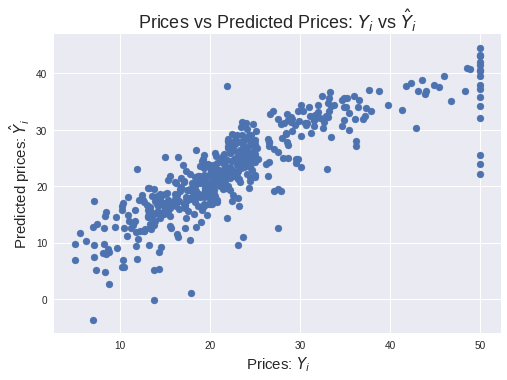

In [68]:
plt.scatter(bos['PRICE'], m13.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

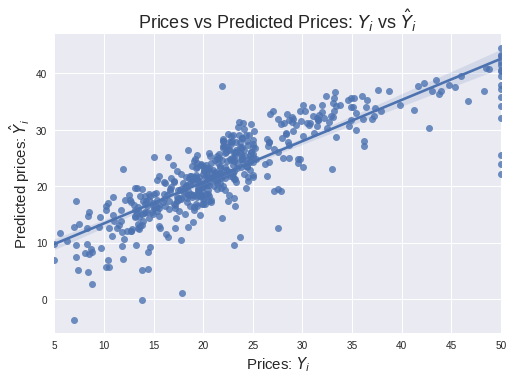

In [85]:
prices_df=pd.DataFrame()
prices_df["Predicted_Prices"]=m13.fittedvalues.values
prices_df["Real_Prices"]=bos.PRICE.values
sns.regplot(y="Predicted_Prices", x="Real_Prices", data=prices_df, fit_reg = True)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

In [70]:
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Different types of residuals: 
Copied from: [link text](https://stats.stackexchange.com/questions/22653/raw-residuals-versus-standardised-residuals-versus-studentised-residuals-what/110615#110615)

**Raw**: Raw residuals without standardization

**Standardized**: this is actually the raw residuals divided by the true standard deviation of the residuals. As the true standard deviation is rarely known, a standardized residual is almost never used.

**Internally Studentized**: because the true standard deviation of the residuals is not typically known, the estimated standard deviation is used instead. This is an interanlly studentized residual, and it is what you called standardized.

**Externally Studentized**: the same as the internally studentized residual, except that the estimate of the standard deviation of the residuals is calcuated from a regression leaving out the observation in question.

**Pearson**: the raw residual divided by the standard deviation of the response variable (the y variable) rather than of the residuals. You don't have this one listed.

"leave one out": Doesn't have a formal name, but it is the same as the class notes.

standarized "leave one out": also doesn't have a formal name, but this is not what the class notes call studentized.

In [71]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

In [72]:
model_fitted_y

0      30.003843
1      25.025562
2      30.567597
3      28.607036
4      27.943524
         ...    
501    23.533341
502    22.375719
503    27.627426
504    26.127967
505    22.344212
Length: 506, dtype: float64

In [73]:
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Residuals vs Fitted
First up is the Residuals vs Fitted plot. This graph shows if there are any nonlinear patterns in the residuals, and thus in the data as well. One of the mathematical assumptions in building an OLS model is that the data can be fit by a line. If this assumption holds and our data can be fit by a linear model, then we should see a relatively flat line when looking at the residuals vs fitted.

An example of this failing would be trying to fit the function 
f
(
x
)
=
x
2
 with a linear regression 
y
=
β
0
+
β
1
x
. Clearly, the relationship is nonlinear and thus the residuals have non-random patterns.

Here is a link that can help explain the plot: [Penn State U](https://online.stat.psu.edu/stat501/lesson/4/4.2)

<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

_A:_ The plot looks for nonlinear patterns in the residuals. Ideally, we should not see a pattern and the data will look like random noise. Thus, the red line would be horizontal.

As seen below, The red bow-shaped line  Notice the bow-shaped line in red means we are failing to capture some non-linear features of the model. One possible solution to fix this issue is to use the square(or some other non-linear transformation) of one or more of the features. This might help capture more of the variancein the data.

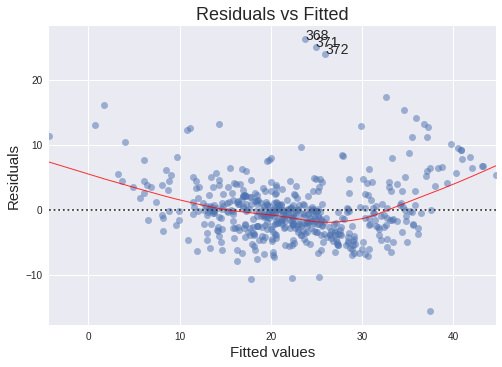

In [74]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.PRICE, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');
# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i,
                               xy=(model_fitted_y[i],
                                   model_residuals[i]));

## Normal Q-Q Plot
This plot shows if the residuals are normally distributed. A good normal QQ plot has all of the residuals lying on or close to the red line.

Link for explanation: [Engineering Statistics Handbook](https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm)

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

_A:_ Looking at the graph below, there are several points that fall far away from the red line. This is indicative of the errors not being normally distributed, in fact our model suffers from “heavy tails” (probably right skewed).

What does this say about the data? We are more likely to see extreme values than to be expected if the data was truly normally distributed.

"In general, there is plenty of wiggle room in violating these assumptions, but it is good to know what assumptions about the data we are violating."

# np.argsort()
[Official Docs](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

[Stack Explanation](https://stackoverflow.com/questions/17901218/numpy-argsort-what-is-it-doing)

[Geek for Geek Explanation](https://www.geeksforgeeks.org/numpy-argsort-in-python/#:~:text=26%2D12%2D2018-,numpy.,that%20would%20sort%20the%20array.)

# np.flip()

Pay attention to axis=0

[Docs](https://numpy.org/doc/stable/reference/generated/numpy.flip.html)

[Picture Explanation](https://www.w3resource.com/numpy/manipulation/flip.php#:~:text=The%20flip()%20function%20is,but%20the%20elements%20are%20reordered.)


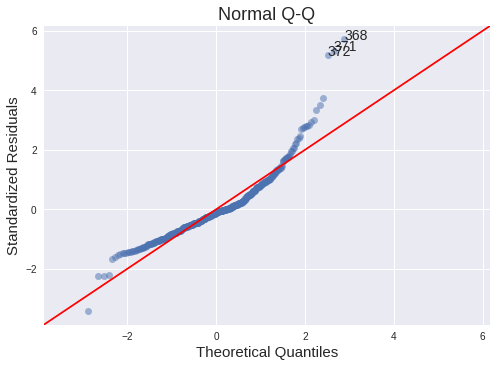

In [75]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

_A:_ I don't know, I have to ask. 

QQ plot is easy to assess across different models as the points would ideally lie on the 45 degree line. The fitted vs residual plot is harder to compare to other models as it is heavily dependent on the "fit" of the model.  

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

_A:_ The model identified 3 big outliers. This may due to negative predicted prices vs actual prices, newly renovated homes, homes in nice neighborhoods, or nice homes in poor neighborhoods.

# Residuals vs Leverage
Leverage points are nasty buggers. Unlike outliers, which have an unusually large 
y
 value, leverage points have extreme 
x
 values. This may not seem so bad at face value, but it can have damaging effects on the model because the 
β
 coefficients are very sensitive to leverage points. The purpose of the Residuals vs Leverage plot is to identify these problematic observations.

Fortunately, this arguably one of the easiest plots to interpret. Thanks to Cook’s Distance, we only need to find leverage points that have a distance greater than 0.5. In this plot, we do not have any leverage points that meet this criteria.

In practice, there may be cases where we may want to remove points with a Cook’s distance of less than 0.5, especially if there are only a few observations compared to the rest of the data. I would argue that removing the point on the far right of the plot should improve the model. If the point is removed, we would re-run this analysis again and determine how much the model improved.

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>


"\nThe below code did not work and it was to have the cook's line in the top right corner.\n"

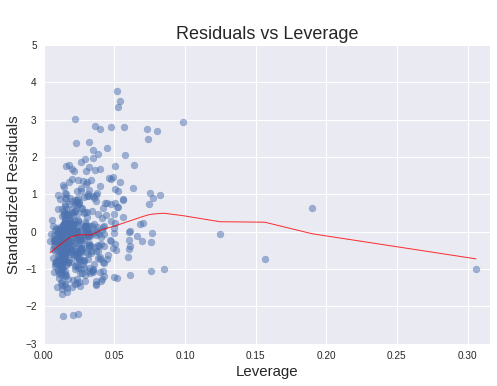

In [84]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                               xy=(model_leverage[i],
                                   model_norm_residuals[i]));

'''
The below code did not work and it was to have the cook's line in the top right corner.
'''
# p = len(model_fit.params) # number of model parameters
# graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
#       np.linspace(0.001, max(model_leverage), 50),
#       'Cook\'s distance') # 0.5 line
# graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
#       np.linspace(0.001, max(model_leverage), 50)) # 1 line
# plot_lm_4.legend(loc='upper right');

# <p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>



In [82]:
abs_norm_resid_top_3

array([368, 371, 372])

In [86]:
print('From the Residual vs Fitted and Quantile-Quantile plot, I will remove the following rows: ', abs_norm_resid_top_3 )

From the Residual vs Fitted and Quantile-Quantile plot, I will remove the following rows:  [368 371 372]


In [81]:
leverage_top_3

array([368, 372, 364])

In [107]:
np_otl = np.concatenate([abs_norm_resid_top_3, leverage_top_3[~np.isin(leverage_top_3,abs_norm_resid_top_3)]])
# z = np.concatenate([x, y[~np.isin(y,x)])
np_otl

array([368, 371, 372, 364])

In [87]:
print('From the Residuals vs Leverage plot, I will remove the following rows: ', leverage_top_3)

From the Residuals vs Leverage plot, I will remove the following rows:  [368 372 364]


In [92]:
rvfqq_todrop = dataframe.iloc[abs_norm_resid_top_3]
rvfqq_todrop

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


In [94]:
rvl_todrop = dataframe.iloc[leverage_top_3]
rvl_todrop

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9


In [109]:
outliers = dataframe.iloc[[368, 371, 372, 364]]
outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9


In [112]:
df_no_otl = dataframe.drop(np_otl)
df_no_otl.shape

(502, 14)

In [111]:
dataframe.shape

(506, 14)

In [114]:
# m = ols('PRICE ~ PTRATIO',bos).fit()
m13_no_otl = ols('PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT',df_no_otl).fit()
print(m13_no_otl.summary())
print(m13.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     141.4
Date:                Mon, 03 Aug 2020   Prob (F-statistic):          2.27e-150
Time:                        23:20:31   Log-Likelihood:                -1438.1
No. Observations:                 502   AIC:                             2902.
Df Residuals:                     489   BIC:                             2957.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.3270      4.539      4.699      0.0

Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

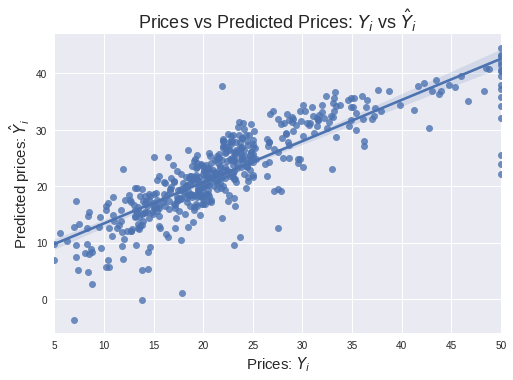

In [117]:
prices_df=pd.DataFrame()
prices_df["Predicted_Prices"]=m13.fittedvalues.values
prices_df["Real_Prices"]=bos.PRICE.values
sns.regplot(y="Predicted_Prices", x="Real_Prices", data=prices_df, fit_reg = True)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

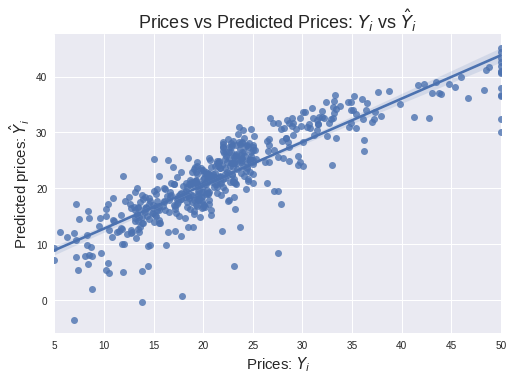

In [116]:
prices_df=pd.DataFrame()
prices_df["Predicted_Prices"]=m13_no_otl.fittedvalues.values
prices_df["Real_Prices"]=df_no_otl.PRICE.values
sns.regplot(y="Predicted_Prices", x="Real_Prices", data=prices_df, fit_reg = True)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

Text(0.5, 0, 'Normalized residuals')

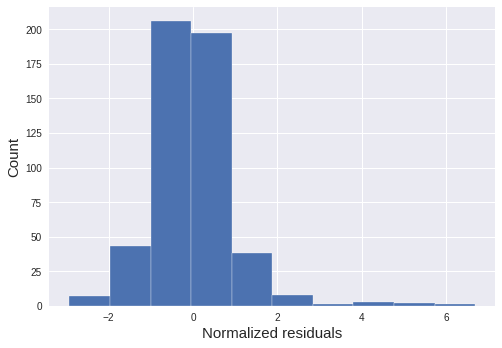

In [76]:
# Your turn.
# resid_pearson is the updated version of norm_resid()
plt.hist(m3.resid_pearson)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')